# Loan Default Prediction

#### Sources:
- https://www.kaggle.com/kmldas/loan-default-prediction
- https://www.kaggle.com/kmldas/beginner-s-guide-to-eda-financial-analytics

___

## EDA

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in and examine data

In [2]:
data = pd.read_csv('Default_Fin.csv')

In [3]:
print(data.head())

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


#### Summary statistics observations:
- ~70% of loan customers are employed
- ~3% of customers defaulted on loans (low)
- very high annual salary (average of $402k)

### Feature Engineering
- we don't have any info on loan amounts, durations, interest rates, etc.
- basic assumption: customers with a higher salary and bank balance will have more resources to avoid default
- savings rate -- proportion of bank balance to annual salary
- reserve capacity -- my attempt to define the ability to finance a loan with both income and existing bank balance

In [20]:
# savings rate
data['Savings Rate'] = data['Bank Balance'] / data['Annual Salary']

# reserve capacity
data['Reserve Capacity'] = (data['Employed'] * np.sqrt(data['Savings Rate']) 
                            * data['Annual Salary']) + (data['Bank Balance'] * 0.5)

### Visualizations

Text(0.5, 1.0, 'Reserve Capacity')

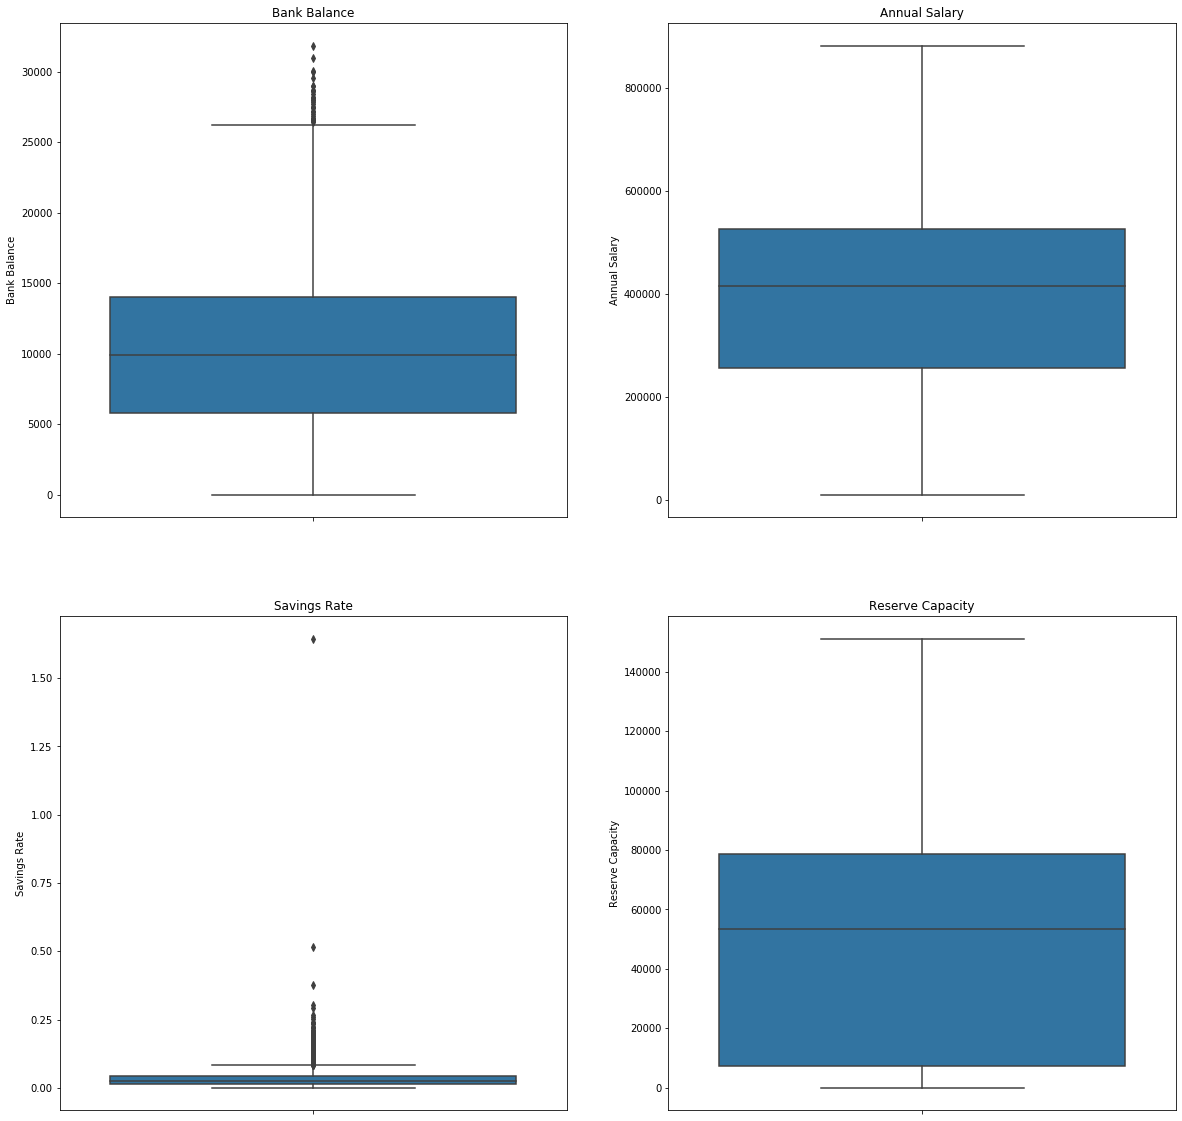

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))

# Bank Balance
sns.boxplot(ax=axs[0,0], y=data['Bank Balance'])
axs[0,0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(ax=axs[0,1], y=data['Annual Salary'])
axs[0,1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(ax=axs[1,0], y=data['Savings Rate'])
axs[1,0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(ax=axs[1,1], y=data['Reserve Capacity'])
axs[1,1].set_title('Reserve Capacity')

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.hist(data['Bank Balance'])

plt.subplot(1,2,2)
plt.hist(data['Annual Salary'])

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(data['Employed'])

plt.subplot(1,2,2)
sns.countplot(data['Defaulted?'])

In [ ]:
print('Total Employed vs. Unemployed: ')
display(data['Employed'].value_counts())

print('\nFraction Employed vs. Unemployed:')
data['Employed'].value_counts(normalize=True)

In [ ]:
print('Total Non-Defaulted vs. Defaulted: ')
display(data['Defaulted?'].value_counts())

print('\nFraction Non-Defaulted vs. Defaulted: ')
data['Defaulted?'].value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data['Defaulted?'], data['Bank Balance'])

plt.subplot(1,2,2)
sns.boxplot(data['Defaulted?'], data['Annual Salary'])

In [ ]:
pd.crosstab(data['Employed'], data['Defaulted?'], normalize='index')

In [ ]:
colormap = plt.cm.bwr
plt.figure(figsize=(10,10))
sns.heatmap(data[['Bank Balance', 'Annual Salary', 'Defaulted?', 'Employed']].corr(), linewidths=0.1, vmax=1.0, 
            cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', size=15)

In [ ]:
# split into data and target
X = data[['Employed', 'Bank Balance', 'Annual Salary']].values
y = data['Defaulted?'].values

In [ ]:
pd.plotting.scatter_matrix(data[['Employed', 'Bank Balance', 'Annual Salary']], c = y, figsize=[8,8], s=100, marker='D')
plt.show()

In [ ]:
sns.pairplot(data[['Defaulted?', 'Employed', 'Bank Balance', 'Annual Salary']], hue='Defaulted?', palette='seismic', height=1.2,
                diag_kind='kde', diag_kws={'bw': 0.25}, plot_kws=dict(s=10))


### Models

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import metrics, roc_curve, roc_auc_score
from sklearn.preprocessing import scale

#### Scale and Split data

In [ ]:
X_scaled = scale(X)

In [ ]:
print('Means before scaling: ', np.mean(X, axis=0))
print('Standard Deviations before scaling: ', np.std(X, axis=0))

In [ ]:
print('Means after scaling: ', np.mean(X_scaled, axis=0))
print('Standard Deviations after scaling: ', np.std(X_scaled, axis=0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### K Nearest Neighbors Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
knn.score(X_train, y_train)

##### KNN Model Complexity Analysis

In [ ]:
neighbors_range = np.linspace(1, 25, num=500)

In [ ]:
test_scores = []
train_scores = []
for n in neighbors_range:
    n = int(n)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    test_scores.append(test_score)
    train_scores.append(train_score)

In [ ]:
score_list = [neighbors_range, train_scores, test_scores]
scores = pd.DataFrame(score_list).transpose()
scores.columns=['range', 'test', 'train']
sns.lineplot(data=scores[['test','train']])

In [ ]:
scores